In [90]:
# Chargement des librairies nécessaires
import os, sys, time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Importer beautiful soup
from bs4 import BeautifulSoup as bs

# Remplacement de character
import re

In [ ]:
'''
SELECT TOP 50000 Title, Body, Tags, Id, Score, FavoriteCount, AnswerCount  
FROM Posts
WHERE PostTypeId = 1 
AND ViewCount > 10 
AND Score > 5 
AND AnswerCount > 0 
AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5 
AND Id NOT IN (SELECT TOP 150000 Id FROM Posts WHERE PostTypeId = 1 AND ViewCount > 10 AND Score > 5 AND AnswerCount > 0 AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5 ORDER BY Id) 
ORDER BY Id
'''

In [134]:
data = "./data/source/"
os.listdir(data)

['.ipynb_checkpoints',
 'QueryResults_1.csv',
 'QueryResults_2.csv',
 'QueryResults_3.csv',
 'QueryResults_4.csv']

In [135]:
dataset1 = data + "QueryResults_1.csv"
dataset2 = data + "QueryResults_2.csv"
dataset3 = data + "QueryResults_3.csv"
dataset4 = data + "QueryResults_4.csv"

In [136]:
# Chargement des datasets
data1 = pd.read_csv(dataset1)
data2 = pd.read_csv(dataset2)
data3 = pd.read_csv(dataset3)
data4 = pd.read_csv(dataset4)

In [137]:
# Merger les résultats
merge = [data1, data2, data3, data4]
data = pd.concat(merge, ignore_index=True)

In [138]:
# Visualisation
data.head()

,Title,Body,Tags,Id,Score,FavoriteCount,AnswerCount
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...,4,796,0.0,14
1,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,11,1645,0.0,41
2,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,13,701,0.0,27
3,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...,19,351,0.0,23
4,How to use the C socket API in C++ on z/OS,<p>I'm having issues getting the C sockets API...,<c++><c><sockets><mainframe><zos>,25,175,0.0,9


In [23]:
data.tail()

,Title,Body,Tags,Id,Score,FavoriteCount,AnswerCount
49995,Ionic 4 horizontal scroll with ngFor,<p>I'm at a loss. I can get horizontal scroll...,<css><angular><ionic-framework><ngfor><ionic4>,54413418,7,NaN,3
49996,Type hinting with descriptors,"<p>In <a href=""https://github.com/python/mypy/...",<python><python-3.x><type-hinting><mypy><pytho...,54413434,12,0.0,3
49997,How to add multiple lines between code blocks ...,"<p>I started using Prettier, but discovered th...",<javascript><node.js><typescript><visual-studi...,54413716,7,0.0,1
49998,React-Select Scrollbar Styling,<p>I am trying to change the style of scrollba...,<reactjs><frontend><scrollbar><styling><react-...,54413762,7,0.0,2
49999,Convert sklearn.svm SVC classifier to Keras im...,<p>I'm trying to convert some old code from us...,<machine-learning><keras><scikit-learn><neural...,54414392,19,0.0,3


In [24]:
data.sample(20)

,Title,Body,Tags,Id,Score,FavoriteCount,AnswerCount
12107,"""document is not defined"" ES6 import with Jasm...",<p>I'm having trouble working out how to set u...,<javascript><unit-testing><jasmine><ecmascript...,39691486,6,NaN,1
46437,Libgdx 3D Texture Transparency,<p>I'm having a problem with a texture which h...,<java><libgdx><textures><transparency><alphabl...,19112349,7,0.0,3
39931,R plotly hover label text alignment,<p>I'm adding custom hover text for scatterplo...,<r><hover><plotly><scatter-plot><r-plotly>,50003531,11,NaN,1
36219,Tensorflow can't detect GPU when invoked by Ra...,<p>When I try the following code sample for us...,<tensorflow><machine-learning><neural-network>...,48471716,7,NaN,1
7211,Nginx Does Not Pass Cookies To Proxy,<p>I have a cookie set will work for all subdo...,<php><ajax><apache><cookies><nginx>,22175000,29,0.0,2
9090,"Nginx RTMP Module receive x.264 , output HLS l...",<p><strong>Goal</strong>: Stream from PC using...,<nginx><stream><rtmp><live-streaming><http-liv...,38765115,8,0.0,2
4369,WebViewFragment webView is null after doing a ...,<p>I currently have my application set up with...,<android><android-3.0-honeycomb><android-webvi...,9161192,13,0.0,4
6576,Customize right click highlight on view-based ...,<p>I have a view-based NSTableView with a cust...,<objective-c><cocoa><contextmenu><nstableview>...,9619664,9,0.0,5
39322,Is there a naming convention for HTML form fie...,<p>Is there a naming convention for form field...,<html><forms><autocomplete><naming-conventions...,6365395,11,0.0,1
44022,How to play multiple sound files on one Web Pa...,<p>I have a page where there is a list of voca...,<php><javascript><jquery><audio><text-to-speech>,7198648,7,NaN,1


### Structure 

In [25]:
data.shape

(200000, 7)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          200000 non-null  object 
 1   Body           200000 non-null  object 
 2   Tags           200000 non-null  object 
 3   Id             200000 non-null  int64  
 4   Score          200000 non-null  int64  
 5   FavoriteCount  174317 non-null  float64
 6   AnswerCount    200000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 12.2+ MB


In [28]:
data.dtypes

Title             object
Body              object
Tags              object
Id                 int64
Score              int64
FavoriteCount    float64
AnswerCount        int64
dtype: object

In [29]:
data.dtypes.value_counts()

object     3
int64      3
float64    1
dtype: int64

In [30]:
data.nunique()

Title            199992
Body             200000
Tags             191464
Id               200000
Score              1118
FavoriteCount         4
AnswerCount          79
dtype: int64

On voit qu'il y a des titres de questions qui se repetent mais pas le texte meme de la question. Les id sont bien uniques.

In [31]:
tmp = data.nunique()
tmp

Title            199992
Body             200000
Tags             191464
Id               200000
Score              1118
FavoriteCount         4
AnswerCount          79
dtype: int64

In [33]:
tmp[tmp<10]

FavoriteCount    4
dtype: int64

In [34]:
tmp[tmp>1000]

Title    199992
Body     200000
Tags     191464
Id       200000
Score      1118
dtype: int64

### Nan et dupliqué

In [38]:
data.isna().sum()

Title                0
Body                 0
Tags                 0
Id                   0
Score                0
FavoriteCount    25683
AnswerCount          0
dtype: int64

In [39]:
data.isna().mean()

Title            0.000000
Body             0.000000
Tags             0.000000
Id               0.000000
Score            0.000000
FavoriteCount    0.128415
AnswerCount      0.000000
dtype: float64

Valeurs manquantes uniquement pour FavoriteCount

<AxesSubplot:>

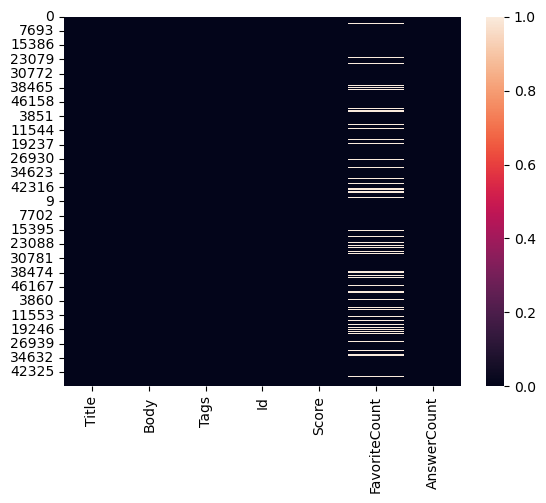

In [40]:
sns.heatmap(data.isna())

In [41]:
# Pas de lignes exactement identiques
data.duplicated().sum()

0

In [43]:
# 0 corps de questions qui sont dupliqués
data.duplicated(subset = ['Body']).sum()

0

In [45]:
for col in data.columns :
    print('col',col,'-> duplicated : ', data.duplicated(subset = [col]).sum())

col Title -> duplicated :  8
col Body -> duplicated :  0
col Tags -> duplicated :  8536
col Id -> duplicated :  0
col Score -> duplicated :  198882
col FavoriteCount -> duplicated :  199995
col AnswerCount -> duplicated :  199921


In [47]:
data.describe(include = np.number)

,Id,Score,FavoriteCount,AnswerCount
count,2.000000e+05,200000.000000,174317.000000,200000.000000
mean,2.254972e+07,27.196440,0.000281,3.475995
std,1.578556e+07,140.862624,0.079905,3.560889
min,4.000000e+00,6.000000,0.000000,1.000000
25%,8.323410e+06,7.000000,0.000000,2.000000
50%,2.008313e+07,10.000000,0.000000,3.000000
75%,3.558560e+07,19.000000,0.000000,4.000000
max,5.441439e+07,26968.000000,32.000000,133.000000


In [48]:
data.describe(include = object)

,Title,Body,Tags
count,200000,200000,200000
unique,199992,200000,191464
top,HTML Agility Pack,<p>I want to assign the decimal variable &quot...,<javascript><jquery><html><css><twitter-bootst...
freq,2,1,112


In [49]:
data.describe()

,Id,Score,FavoriteCount,AnswerCount
count,2.000000e+05,200000.000000,174317.000000,200000.000000
mean,2.254972e+07,27.196440,0.000281,3.475995
std,1.578556e+07,140.862624,0.079905,3.560889
min,4.000000e+00,6.000000,0.000000,1.000000
25%,8.323410e+06,7.000000,0.000000,2.000000
50%,2.008313e+07,10.000000,0.000000,3.000000
75%,3.558560e+07,19.000000,0.000000,4.000000
max,5.441439e+07,26968.000000,32.000000,133.000000


### Selection des colonnes 

In [139]:
cols = ['Title','Body', 'Tags']
data = data[cols]
data.head()

,Title,Body,Tags
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...
1,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...
2,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...
3,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...
4,How to use the C socket API in C++ on z/OS,<p>I'm having issues getting the C sockets API...,<c++><c><sockets><mainframe><zos>


In [140]:
data.Body[1]

'<p>Given a specific <code>DateTime</code> value, how do I display relative time, like:</p>\n<ul>\n<li><code>2 hours ago</code></li>\n<li><code>3 days ago</code></li>\n<li><code>a month ago</code></li>\n</ul>\n'

### Premier nettoyage

In [141]:
# Supprimer les balises html de notre corps de question 
data.Body = data.Body.apply(lambda x: bs(x, "lxml").text)

In [142]:
# Visualisation
data.Body[1]

'Given a specific DateTime value, how do I display relative time, like:\n\n2 hours ago\n3 days ago\na month ago\n\n'

In [143]:
# Suppresion des retours à la ligne 
to_clean = re.compile('\n')

data.Body = data.Body.apply(lambda x: re.sub(to_clean, ' ', x))

In [144]:
data.Body[1]

'Given a specific DateTime value, how do I display relative time, like:  2 hours ago 3 days ago a month ago  '

In [145]:
data.head()

,Title,Body,Tags
0,How to convert Decimal to Double in C#?,"I want to assign the decimal variable ""trans"" ...",<c#><floating-point><type-conversion><double><...
1,Calculate relative time in C#,"Given a specific DateTime value, how do I disp...",<c#><datetime><time><datediff><relative-time-s...
2,Determine a user's timezone,Is there a standard way for a web server to be...,<html><browser><timezone><user-agent><timezone...
3,What is the fastest way to get the value of π?,I'm looking for the fastest way to obtain the ...,<performance><algorithm><language-agnostic><un...
4,How to use the C socket API in C++ on z/OS,I'm having issues getting the C sockets API to...,<c++><c><sockets><mainframe><zos>


#### Duplicated

In [146]:
# Observation des données dupliquées sur la variable Title
idx = data.duplicated(subset = 'Title', keep = 'first')
data.loc[idx,:].sort_values('Title')

,Title,Body,Tags
54210,A potentially dangerous Request.Form value was...,I have this issue. I have tried everything. Va...,<c#><jquery><asp.net><architecture><postback>
30860,Git post-receive hook not working,"My setup is a windows XAMPP server, with cURL ...",<git><curl><hudson><githooks><git-post-receive>
15539,HTML Agility Pack,I want to parse the html table using html agil...,<c#><.net><winforms><html-parsing><html-agilit...
170974,Injection of autowired dependencies failed; ne...,I am new here and I am trying to create an e-s...,<java><spring><hibernate><maven><spring-mvc>
44368,LINQ to Entities does not recognize the method,I'm getting the following error when trying to...,<.net><linq><entity-framework><linq-to-entitie...
22565,Pointcut matching methods with annotated param...,I need to create an aspect with a pointcut mat...,<java><parameters><annotations><aop><aspectj>
71179,The ObjectContext instance has been disposed a...,I'm having trouble with one of my queries beca...,<entity-framework><lazy-loading><entity-framew...
73759,error LNK2019: unresolved external symbol,while i want to compile my opengl code i get t...,<c++><opengl><linker-errors><glut><glew>


In [147]:
# Suppression des doublons sur cette variable
data.drop_duplicates(subset = 'Title', inplace = True)

#### NA

In [148]:
data.isna().mean()

Title    0.0
Body     0.0
Tags     0.0
dtype: float64

In [149]:
# Enregistrement 
data.to_csv('data/cleaned/df_cleaned.csv', index = False)

On travaille sur de l'apprentissage supervisé dans un premier temps donc on ne travaille pas avec une target, on supprime donc les tags, que nous cherchons à prédire/proposer.

In [150]:
cols = ['Title', 'Body']
data = data[cols]
data.head()

,Title,Body
0,How to convert Decimal to Double in C#?,"I want to assign the decimal variable ""trans"" ..."
1,Calculate relative time in C#,"Given a specific DateTime value, how do I disp..."
2,Determine a user's timezone,Is there a standard way for a web server to be...
3,What is the fastest way to get the value of π?,I'm looking for the fastest way to obtain the ...
4,How to use the C socket API in C++ on z/OS,I'm having issues getting the C sockets API to...
